In [ ]:
# 패키지 설치
!pip install yfinance --quiet

In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

In [2]:
# 데이터 다운로드
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2011-01-01', actions=False)
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data = data.droplevel(0, axis=1).resample('M').last()

[*********************100%%**********************]  9 of 9 completed


In [3]:
# 수익률 데이터
ret = data.pct_change().dropna()

# 공분산 행렬
## 연율화
cov_mat = ret.cov() * 12

In [4]:
# 공분산 행렬 고윳값 분해
w, v = np.linalg.eig(cov_mat)

In [5]:
v # 고유값 행렬

array([[ 0.38332496, -0.09534155,  0.11104322, -0.31296941,  0.34845143,
        -0.29295991, -0.7236336 , -0.05141995, -0.01256996],
       [ 0.51590464,  0.76772333, -0.20797854,  0.30047121, -0.01325927,
        -0.09319823,  0.04231576, -0.01232906,  0.01004565],
       [ 0.37850512,  0.03161263,  0.14752016, -0.49018204,  0.30940581,
         0.58942488,  0.34956379, -0.13897477,  0.09503378],
       [ 0.3649519 , -0.11382798,  0.04763889, -0.27738561, -0.79591778,
         0.09533699, -0.09459264,  0.18951123, -0.29530414],
       [ 0.30542781, -0.32995851,  0.2851058 ,  0.53337696,  0.09988606,
         0.07788059,  0.07302806, -0.41778326, -0.48594894],
       [ 0.17967001, -0.22914723, -0.38653725, -0.02646611,  0.34806308,
        -0.16493447,  0.27627173,  0.60360551, -0.41962098],
       [ 0.12111287, -0.30193045, -0.7648177 ,  0.15475485, -0.06830437,
         0.3449583 , -0.2395033 , -0.24107696,  0.21478559],
       [ 0.22610491, -0.21535389, -0.14638701, -0.22725705, -0

In [6]:
w # 고유값

array([0.20279701, 0.03817052, 0.02005076, 0.01162994, 0.00258181,
       0.00708746, 0.0063743 , 0.00382142, 0.00472973])

<Axes: >

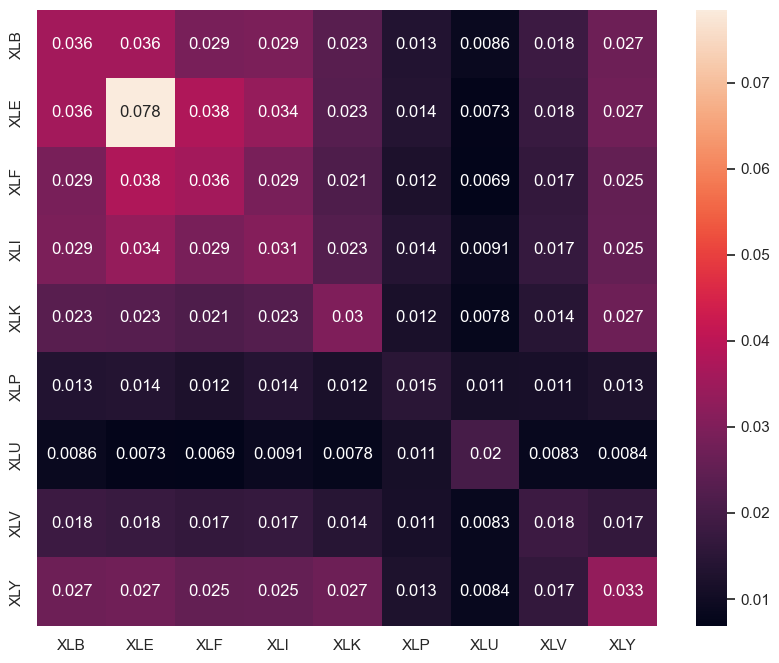

In [7]:
# 공분산 행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(cov_mat, annot=True)

In [8]:
# 공분산 행렬의 역행렬 계산 함수
def inverse_cov_mat(cov_mat, eps=0.05, is_plot=True):

    # 고윳값 분해
    w, v = np.linalg.eig(cov_mat)
    
    # 고윳값이 음수라면 0으로 치환
    if np.where(w >= 0, True, False).sum() != len(w):
        w = np.where(w < 0, 0, w)

    # 유의미하지 않는 고윳값을 0으로 처리
    weighted_w = w / np.sum(w)
    noise_free_w = np.where(weighted_w >= eps, w, 0)

    # 고윳값과 상대적 가중치에 대한 그래프 생성
    if is_plot:
        plt.plot(np.sort(w)[::-1], marker='o', label='eigenvalue')
        plt.plot(np.sort(noise_free_w)[::-1], marker='x', label='updated eigenvalue')
        plt.legend()
        plt.show()

    # 역행렬 계산
    inv_mat = v @ np.diag(np.where(noise_free_w != 0, 1 / noise_free_w, 0)) @ v.T
    new_cov_mat = v @ np.diag(noise_free_w) @ v.T

    return inv_mat, new_cov_mat

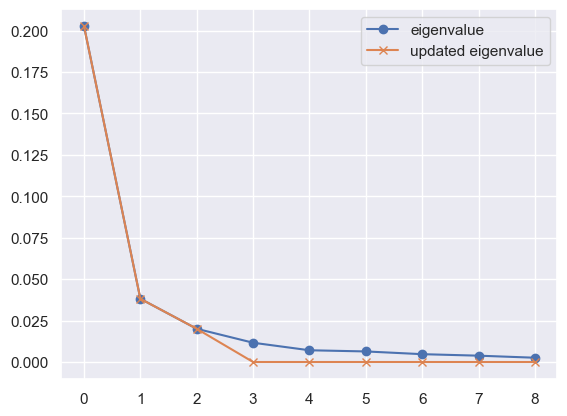

/var/folders/yk/mqxs9f0j1cl49wzf3bk7xxvc0000gn/T/ipykernel_41554/1452258181.py:23: RuntimeWarning: divide by zero encountered in divide
  inv_mat = v @ np.diag(np.where(noise_free_w != 0, 1 / noise_free_w, 0)) @ v.T


In [9]:
# 업데이트된 공분산 행렬
inv_mat, new_cov_mat = inverse_cov_mat(cov_mat)

<Axes: >

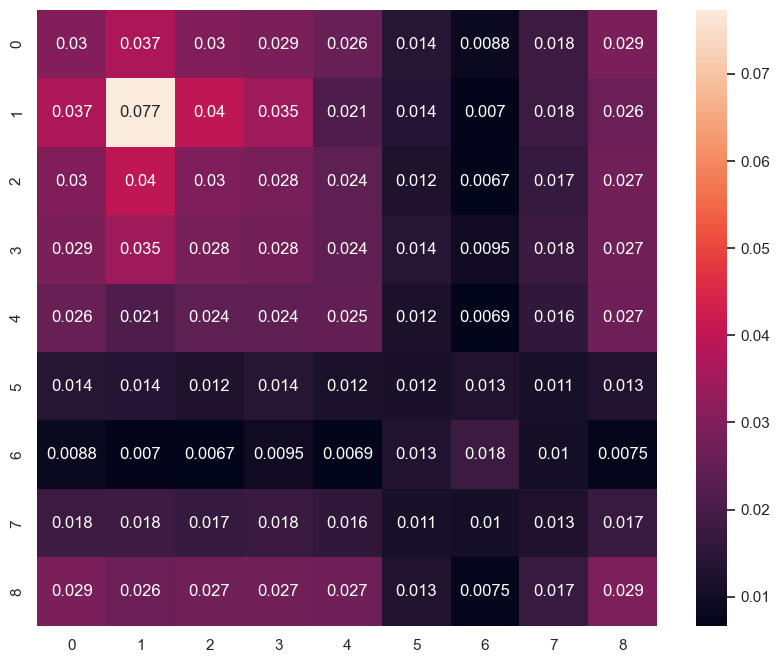

In [10]:
# 공분산 행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(new_cov_mat, annot=True)

Copyright 2022. 퀀트대디. All rights reserved.